Women's Shoe Prices
A list of 10,000 women's shoes and the prices at which they are sold.

In [13]:
# Load the data
import os
from sklearn import preprocessing, metrics

# Parameters
do_grid_search_cv = True
do_pca = False
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters
do_grid_search_cv = True
do_pca = False

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def read_data(path, filename):
    return pd.read_csv(os.path.join(path, filename))


original_data = read_data('C:/Users/Mirela/PycharmProjects/Womens Shoe Prices/archive', 'Datafiniti_Womens_Shoes.csv')

print(original_data.head())
print(original_data.dtypes)
print(original_data.isna().sum())
print(original_data.head())


                     id             dateAdded           dateUpdated asins  \
0  AVpfEf_hLJeJML431ueH  2015-05-04T12:13:08Z  2018-01-29T04:38:43Z   NaN   
1  AVpi74XfLJeJML43qZAc  2017-01-27T01:23:39Z  2018-01-03T05:21:54Z   NaN   
2  AVpi74XfLJeJML43qZAc  2017-01-27T01:23:39Z  2018-01-03T05:21:54Z   NaN   
3  AVpjXyCc1cnluZ0-V-Gj  2017-01-27T01:25:56Z  2018-01-04T11:52:35Z   NaN   
4  AVphGKLPilAPnD_x1Nrm  2017-01-27T01:25:56Z  2018-01-18T03:55:18Z   NaN   

         brand                                         categories  \
0  Naturalizer  Clothing,Shoes,Women's Shoes,All Women's Shoes...   
1     MUK LUKS  Clothing,Shoes,Women's Shoes,Women's Casual Sh...   
2     MUK LUKS  Clothing,Shoes,Women's Shoes,Women's Casual Sh...   
3     MUK LUKS  Clothing,Shoes,Women's Shoes,All Women's Shoes...   
4     MUK LUKS  Clothing,Shoes,Women's Shoes,All Women's Shoes...   

  primaryCategories                          colors                 dimension  \
0             Shoes  Silver,Cream Waterco

In [14]:
# Encode the categorical features as numbers
result = original_data.copy()
transform_dict = {}
for col in result.columns:
    cats = pd.Categorical(result[col]).categories
    d = {}
    for i, cat in enumerate(cats):
        d[cat] = i
    transform_dict[col] = d

transform_dict

inverse_transform_dict = {}
for col, d in transform_dict.items():
    inverse_transform_dict[col] = {v:k for k, v in d.items()}

inverse_transform_dict
features=result.replace(transform_dict)
print(features.head())

    id  dateAdded  dateUpdated  asins  brand  categories  primaryCategories  \
0  389          0          209    NaN     44           4                  0   
1  455         86            7    NaN     39          18                  0   
2  455         86            7    NaN     39          18                  0   
3  469         88           19    NaN     39           9                  1   
4  440         88           70    NaN     39           9                  0   

   colors  dimension  ean  ...  prices.merchant  prices.offer  \
0   187.0        NaN  NaN  ...              4.0           NaN   
1   121.0        NaN  0.0  ...             10.0           NaN   
2   121.0        NaN  0.0  ...              6.0           NaN   
3    12.0       15.0  1.0  ...              6.0           NaN   
4   121.0       15.0  2.0  ...             10.0           NaN   

   prices.returnPolicy  prices.shipping  prices.size  prices.sourceURLs  \
0                  NaN              NaN           70       

<AxesSubplot:>

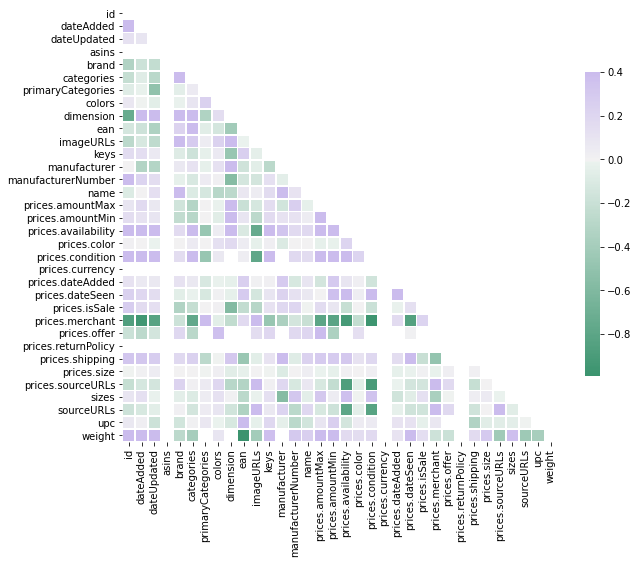

In [15]:
#  get the number of rows in a dataframe

dff = features

# Compute the correlation matrix, excluding missing values

corr = dff.corr()

# Generate a mask for the upper triangle


mask = np.zeros_like(corr, dtype=np.bool) # Return an array of zeros with the same shape and type as a given array.

mask[np.triu_indices_from(mask)] = True # Return the indices for the upper-triangle of arr.

# Set up the matplotlib figure

fig, ax = plt.subplots(figsize=(10, 8)) # Create a figure and a set of subplots.

# Generate a custom diverging colormap

cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True) # Make a diverging palette between two HUSL colors.

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.4, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .7}) #Plot rectangular data as a color-encoded matrix



In [16]:
print(features[['colors','primaryCategories','categories','brand','dateAdded','id','prices.amountMin','prices.amountMax','prices.availability','prices.condition','prices.color','prices.dateSeen','prices.dateAdded']].head(20))
features = features.drop(['asins',
'colors',
'dimension',
'ean',
'manufacturer',
'manufacturerNumber',
'prices.availability',
'prices.condition',
'prices.dateAdded',
'prices.merchant',
'prices.offer',
'prices.returnPolicy',
'prices.shipping',
'upc',
'weight','asins'
],axis=1)
print(features.head())

    colors  primaryCategories  categories  brand  dateAdded   id  \
0    187.0                  0           4     44          0  389   
1    121.0                  0          18     39         86  455   
2    121.0                  0          18     39         86  455   
3     12.0                  1           9     39         88  469   
4    121.0                  0           9     39         88  440   
5     93.0                  0          49     62         40  417   
6    146.0                  0          33     39         65  468   
7    146.0                  0          33     39         65  468   
8    166.0                  0           2     39         38  397   
9     91.0                  0          28     39         39  403   
10    91.0                  0          28     39         39  403   
11    47.0                  0          28     39         25  385   
12   124.0                  0           6     39         37  439   
13   124.0                  0           6     39

In [17]:
# Labels are the values we want to predict
labels = np.array(features['prices.amountMax']) # Create an array.

# Remove the labels from the features
# axis 1 refers to the columns

features = features.drop('prices.amountMax', axis=1) #  Remove columns by specifying label names and coresponding axis


In [18]:
from sklearn.decomposition import PCA

features_reduced = features

if do_pca:
    pca = PCA(n_components=45, whiten=True) # Principal component analysis (PCA)
    features_reduced = pca.fit_transform(features) # Returns X_new : array-like, shape (n_samples, n_components)


PCA to reduce the dimensionality of the training data. The module analyzes the data and creates a reduced feature set that captures all the information contained in the dataset, but in a smaller number of features.

In [19]:
# Using Skicit-learn to split data into training and testing sets

from sklearn.model_selection import train_test_split

# Split data into random train and test subsets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3,
                                                                            random_state=42)
# returns list containing train-test split of inputs.

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)



Training Features Shape: (7000, 18)
Training Labels Shape: (7000,)
Testing Features Shape: (3000, 18)
Testing Labels Shape: (3000,)


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge

# Create the parameter grid based on the results of random search

rf_param_grid = {
    'bootstrap': [True],
    'oob_score': [False],
    'max_depth': [80, 95, 110],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [5, 20, 35],
    'min_samples_split': [2, 16, 32],
    'n_estimators': [500, 1000]
}

# Linreg and Bayesian Ridge as baseline
lreg = LinearRegression()
bayes = BayesianRidge()

Tune Model Hyperparameters:Performs a parameter sweep on a model to determine the optimum parameter settings. Grid sweep: This option creates a matrix, or grid, that includes every combination of the parameters in the value range are specified. When start tuning with this module, multiple models are trained using combinations of these parameters.

In [21]:
# Train the model on training data

lreg.fit(train_features, train_labels)
bayes.fit(train_features, train_labels)

BayesianRidge()

Training is the process of analyzing input data by using the parameters of a predefined model. From this analysis, the model learns the patterns, and saves them in the form of a trained model.

In [22]:
# Train random forest

rf = RandomForestRegressor(
    bootstrap=True,
    criterion='mse',
    max_depth=95,
    max_features='auto',
    max_leaf_nodes=None,
    min_samples_leaf=5,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=1000,
    n_jobs=-1,
    oob_score=True,
    random_state=None,
    verbose=0,
    warm_start=False
)

if do_grid_search_cv:
    rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid,
                                  cv=6, n_jobs=-1, verbose=2)

    rf_grid_search.fit(train_features, train_labels)
    rf = rf_grid_search.best_estimator_
    rf.get_params()

    # Fit the model on all the training data

rf.fit(train_features, train_labels)

# Neural network
from sklearn.neural_network import MLPRegressor

nnet = MLPRegressor(
    hidden_layer_sizes=(60, 20),
    solver='lbfgs',
    alpha=0.02
)

nnet.fit(train_features, train_labels)

Fitting 6 folds for each of 162 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed: 27.5min finished
C:\Users\Mirela\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(alpha=0.02, hidden_layer_sizes=(60, 20), solver='lbfgs')

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Use the model's predict method on the test data

predictions = rf.predict(test_features)# Estimated target values

rmse_rf = sqrt(mean_squared_error(test_labels, predictions))# Return the square root of x.(Mean squared error regression loss)
predictions = lreg.predict(test_features)

rmse_lreg = sqrt(mean_squared_error(test_labels, predictions))

predictions = bayes.predict(test_features)
rmse_bayes = sqrt(mean_squared_error(test_labels, predictions))

predictions = nnet.predict(test_features)
rmse_nnet = sqrt(mean_squared_error(test_labels, predictions))

In [24]:
# Export a decision tree
from sklearn.tree import export_graphviz

# String representation of the input tree in GraphViz dot format.
for i in range(20):
    export_graphviz(rf.estimators_[i],
                    out_file=None,
                    feature_names=None,
                    filled=True,
                    rounded=True)

    print('RMSE Random Forest Regression:', round(np.mean(rmse_rf), 2))
    print('RMSE Linear Regression:', round(np.mean(rmse_lreg), 2))
    print('RMSE Bayesian Ridge Regression:', round(np.mean(rmse_bayes), 2))
    print('RMSE Neural Net Regression:', round(np.mean(rmse_nnet), 2))

RMSE Random Forest Regression: 2.77
RMSE Linear Regression: 11.22
RMSE Bayesian Ridge Regression: 11.21
RMSE Neural Net Regression: 10.43
RMSE Random Forest Regression: 2.77
RMSE Linear Regression: 11.22
RMSE Bayesian Ridge Regression: 11.21
RMSE Neural Net Regression: 10.43
RMSE Random Forest Regression: 2.77
RMSE Linear Regression: 11.22
RMSE Bayesian Ridge Regression: 11.21
RMSE Neural Net Regression: 10.43
RMSE Random Forest Regression: 2.77
RMSE Linear Regression: 11.22
RMSE Bayesian Ridge Regression: 11.21
RMSE Neural Net Regression: 10.43
RMSE Random Forest Regression: 2.77
RMSE Linear Regression: 11.22
RMSE Bayesian Ridge Regression: 11.21
RMSE Neural Net Regression: 10.43
RMSE Random Forest Regression: 2.77
RMSE Linear Regression: 11.22
RMSE Bayesian Ridge Regression: 11.21
RMSE Neural Net Regression: 10.43
RMSE Random Forest Regression: 2.77
RMSE Linear Regression: 11.22
RMSE Bayesian Ridge Regression: 11.21
RMSE Neural Net Regression: 10.43
RMSE Random Forest Regression: 2.7